In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot



In [2]:
df=pd.read_csv(r'C:\Users\staff\Desktop\Staffin\PROJ\IMBD\IMDB-Movie-Data.csv')


In [3]:
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# missing values


In [5]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [6]:
null_data = df[df.isnull().any(axis=1)]
null_data[["Rank",'Title','Genre','Rating','Metascore','Revenue (Millions)']]

,Rank,Title,Genre,Rating,Metascore,Revenue (Millions)
7,8,Mindhorn,Comedy,6.4,71.0,NaN
22,23,Hounds of Love,"Crime,Drama,Horror",6.7,72.0,NaN
25,26,Paris pieds nus,Comedy,6.8,NaN,NaN
26,27,Bahubali: The Beginning,"Action,Adventure,Drama",8.3,NaN,6.50
27,28,Dead Awake,"Horror,Thriller",4.7,NaN,0.01
...,...,...,...,...,...,...
988,989,Martyrs,Horror,7.1,89.0,NaN
989,990,Selma,"Biography,Drama,History",7.5,NaN,52.07
992,993,Take Me Home Tonight,"Comedy,Drama,Romance",6.3,NaN,6.92
995,996,Secret in Their Eyes,"Crime,Drama,Mystery",6.2,45.0,NaN


In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [8]:
null_genre=df.groupby("Genre")
null_genre[['Title']].count()

,Title
Genre,
Action,2
"Action,Adventure",3
"Action,Adventure,Biography",2
"Action,Adventure,Comedy",14
"Action,Adventure,Crime",6
...,...
"Romance,Sci-Fi,Thriller",1
Sci-Fi,2
"Sci-Fi,Thriller",1


In [9]:
import plotly.express as px
fig = px.box(df,y='Metascore')
fig

In [10]:
import plotly.express as px
fig = px.box(df,y='Revenue (Millions)')
fig.show()

In [11]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [12]:
#fillina revenue with median value
df['Revenue (Millions)'].fillna(int(df['Revenue (Millions)'].median()), inplace=True)


In [13]:
df['Metascore'].fillna((df['Metascore'].mean()), inplace=True) #filling metacore with median

In [14]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [15]:
maxvotes=df.sort_values(by='Votes',ascending=False)

In [16]:
maxvotes[['Rank','Title','Genre','Votes']]

,Rank,Title,Genre,Votes
54,55,The Dark Knight,"Action,Crime,Drama",1791916
80,81,Inception,"Action,Adventure,Sci-Fi",1583625
124,125,The Dark Knight Rises,"Action,Thriller",1222645
36,37,Interstellar,"Adventure,Drama,Sci-Fi",1047747
76,77,The Avengers,"Action,Sci-Fi",1045588
...,...,...,...,...
416,417,The Headhunter's Calling,Drama,164
337,338,Tracktown,"Drama,Sport",115
393,394,Whisky Galore,"Comedy,Romance",102
293,294,The Exception,Drama,96


In [17]:
rating=df.loc[(df.Rating)>=8] #movies with rating above 8

In [18]:
rating=rating.sort_values(by=['Rating'], ascending= False).head(10)
rating[['Rank','Title','Rating']]

,Rank,Title,Rating
54,55,The Dark Knight,9.0
80,81,Inception,8.8
117,118,Dangal,8.8
249,250,The Intouchables,8.6
36,37,Interstellar,8.6
96,97,Kimi no na wa,8.6
991,992,Taare Zameen Par,8.5
133,134,Whiplash,8.5
476,477,The Lives of Others,8.5
124,125,The Dark Knight Rises,8.5


In [19]:
meta=df.loc[(df.Metascore)>=80] #movies with metascore above 80
meta

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
13,14,Moana,"Animation,Adventure,Comedy","In Ancient Polynesia, when a terrible curse in...",Ron Clements,"Auli'i Cravalho, Dwayne Johnson, Rachel House,...",2016,107,7.7,118151,248.75,81.0
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0
21,22,Manchester by the Sea,Drama,A depressed uncle is asked to take care of his...,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandle...",2016,137,7.9,134213,47.70,96.0
41,42,Moonlight,Drama,"A chronicle of the childhood, adolescence and ...",Barry Jenkins,"Mahershala Ali, Shariff Earp, Duan Sanderson, ...",2016,111,7.5,135095,27.85,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...
928,929,Good Kids,Comedy,Four high school students look to redefine the...,Chris McCoy,"Zoey Deutch, Nicholas Braun, Mateo Arias, Isra...",2016,86,6.1,3843,47.00,86.0
934,935,The Love Witch,"Comedy,Horror",A modern-day witch uses spells and magic to ge...,Anna Biller,"Samantha Robinson, Jeffrey Vincent Parise, Lau...",2016,120,6.2,4669,0.22,82.0
938,939,The Siege of Jadotville,"Action,Drama,Thriller",Irish Commandant Pat Quinlan leads a stand off...,Richie Smyth,"Jamie Dornan, Mark Strong, Jason O'Mara, Micha...",2016,108,7.3,14689,47.00,83.0
951,952,The Descendants,"Comedy,Drama",A land baron tries to reconnect with his two d...,Alexander Payne,"George Clooney, Shailene Woodley, Amara Miller...",2011,115,7.3,211348,82.62,84.0


In [20]:
meta=meta.sort_values(by=['Metascore'], ascending= False).head(10)
meta[['Rank','Title','Metascore']].head(10)

,Rank,Title,Metascore
656,657,Boyhood,100.0
41,42,Moonlight,99.0
230,231,Pan's Labyrinth,98.0
21,22,Manchester by the Sea,96.0
509,510,Gravity,96.0
489,490,Ratatouille,96.0
111,112,12 Years a Slave,96.0
406,407,Zero Dark Thirty,95.0
501,502,Carol,95.0
324,325,The Social Network,95.0


In [21]:
maxrevenue=df.sort_values(by='Revenue (Millions)',ascending=False)


In [22]:

maxrevenue[['Rank','Title','Genre','Votes']]

,Rank,Title,Genre,Votes
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",661608
87,88,Avatar,"Action,Adventure,Fantasy",935408
85,86,Jurassic World,"Action,Adventure,Sci-Fi",455169
76,77,The Avengers,"Action,Sci-Fi",1045588
54,55,The Dark Knight,"Action,Crime,Drama",1791916
...,...,...,...,...
321,322,Lovesong,Drama,616
68,69,Wakefield,Drama,291
961,962,Into the Forest,"Drama,Sci-Fi,Thriller",10220
27,28,Dead Awake,"Horror,Thriller",523


# Comaring Metascore and rating

In [23]:
meta[['Rank','Title','Rating','Metascore']].head(10)

,Rank,Title,Rating,Metascore
656,657,Boyhood,7.9,100.0
41,42,Moonlight,7.5,99.0
230,231,Pan's Labyrinth,8.2,98.0
21,22,Manchester by the Sea,7.9,96.0
509,510,Gravity,7.8,96.0
489,490,Ratatouille,8.0,96.0
111,112,12 Years a Slave,8.1,96.0
406,407,Zero Dark Thirty,7.4,95.0
501,502,Carol,7.2,95.0
324,325,The Social Network,7.7,95.0


In [24]:
#Directors with highest metascore
directors = df.groupby('Director',as_index=False)['Metascore'].mean()
directors.sort_values(by=['Metascore'], ascending= False).head(30)

,Director,Metascore
58,Barry Jenkins,99.0
363,Kenneth Lonergan,96.0
610,Todd Haynes,95.0
357,Kathryn Bigelow,94.5
425,Michael Goi,94.0
616,Tom McCarthy,93.0
398,Maren Ade,93.0
377,Lee Unkrich,92.0
515,Richard Linklater,91.5
490,Pete Docter,91.0


# Comparing revenue and Rating

In [25]:
df[["Rating","Revenue (Millions)"]]

,Rating,Revenue (Millions)
0,8.1,333.13
1,7.0,126.46
2,7.3,138.12
3,7.2,270.32
4,6.2,325.02
...,...,...
995,6.2,47.00
996,5.5,17.54
997,6.2,58.01
998,5.6,47.00


In [26]:

fig = px.scatter(df, x='Revenue (Millions)', y='Rating')
fig.show()

In [27]:
fig = px.scatter(df, x='Votes', y='Rating')
fig.show()

In [28]:
df3=df.groupby(["Year"],as_index=False).mean()

df3

,Year,Rank,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,2006,588.500000,120.840909,7.125000,269289.954545,84.510455,64.044435
1,2007,576.584906,121.622642,7.133962,244331.037736,84.796792,63.771609
2,2008,625.634615,110.826923,6.784615,275505.384615,98.081154,57.499137
3,2009,586.823529,116.117647,6.960784,255780.647059,107.456078,57.195492
4,2010,587.316667,111.133333,6.826667,252782.316667,102.177500,59.383084
5,2011,589.571429,114.603175,6.838095,240790.301587,86.967619,61.506749
6,2012,532.875000,119.109375,6.925000,285226.093750,107.973281,61.077658
7,2013,556.230769,116.065934,6.812088,219049.648352,85.799121,58.559618
8,2014,512.979592,114.489796,6.837755,203930.224490,83.524490,57.366889
9,2015,491.393701,114.496063,6.602362,115726.220472,74.898583,57.101891


In [29]:
fig = px.bar(df3, x='Year', y='Metascore',color='Revenue (Millions)')
fig.show()

In [30]:
fig = px.bar(df3, x='Year', y='Revenue (Millions)',color='Rating')
fig.show()

In [31]:
fig = px.bar(df3, x='Year', y='Rating',color='Revenue (Millions)')
fig.show()

In [32]:
maxrevenue=df.sort_values(by='Revenue (Millions)',ascending=False)
maxrevenue

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.000000
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.000000
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.000000
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.000000
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
321,322,Lovesong,Drama,The relationship between two friends deepens d...,So Yong Kim,"Riley Keough, Jena Malone, Jessie Ok Gray, Car...",2016,84,6.4,616,0.01,74.000000
68,69,Wakefield,Drama,A man's nervous breakdown causes him to leave ...,Robin Swicord,"Bryan Cranston, Jennifer Garner, Beverly D'Ang...",2016,106,7.5,291,0.01,61.000000
961,962,Into the Forest,"Drama,Sci-Fi,Thriller","After a massive power outage, two sisters lear...",Patricia Rozema,"Ellen Page, Evan Rachel Wood, Max Minghella,Ca...",2015,101,5.9,10220,0.01,59.000000
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,58.985043


Text(0.5, 1.0, 'Highest Revenue Movies by Years')

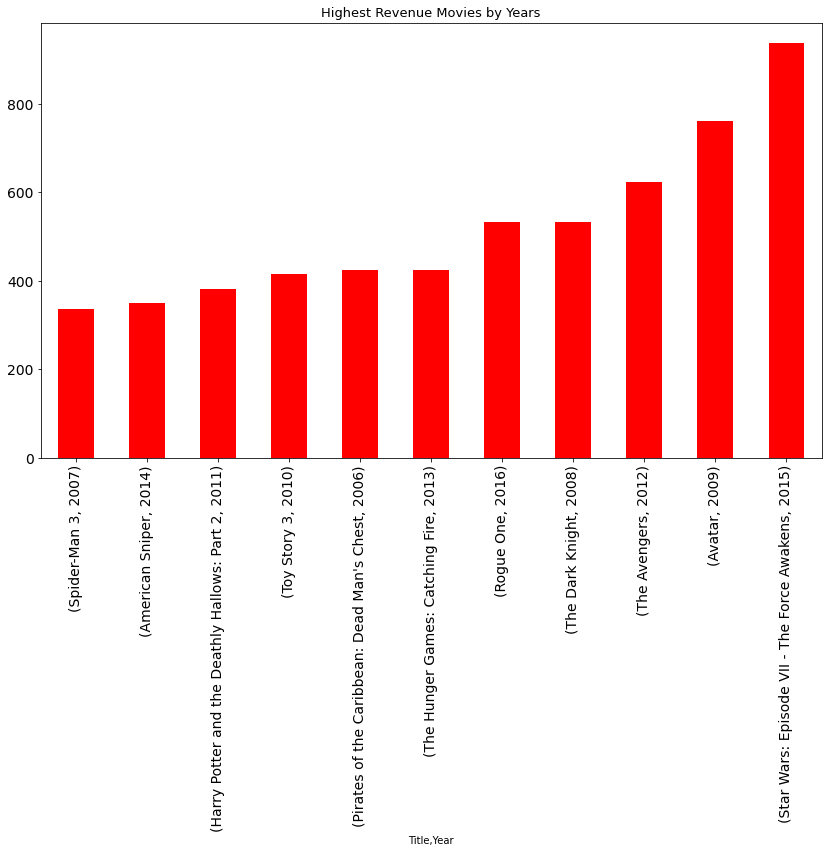

In [33]:
import matplotlib.pyplot as plt
df4 = df.sort_values(by = ["Revenue (Millions)"], ascending = False).groupby("Year").first()
df4.groupby(["Title", "Year"])["Revenue (Millions)"].mean().sort_values().plot.bar(x = "Title", y = "Revenue (Millions)", fontsize = 14, figsize = (14,8), color = "red")
plt.title("Highest Revenue Movies by Years", fontsize = 13)

In [34]:
top_genres = df.groupby(['Genre'],as_index=False).mean().sort_values(by = "Revenue (Millions)", ascending = False)[:10] #based on revenue
top_genres

,Genre,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
81,"Adventure,Fantasy",368.333333,2013.000000,158.000000,7.733333,522664.333333,272.156667,61.000000
71,"Adventure,Drama,Fantasy",515.500000,2012.000000,117.333333,6.150000,274020.000000,237.840000,63.330840
53,"Action,Sci-Fi",430.333333,2012.333333,117.333333,7.300000,484529.333333,232.780000,62.328348
1,"Action,Adventure",333.000000,2011.000000,124.333333,6.400000,334459.000000,223.740000,57.333333
89,"Animation,Adventure,Comedy",419.259259,2013.037037,97.000000,7.200000,219002.407407,214.879630,68.369816
45,"Action,Fantasy,War",114.000000,2006.000000,117.000000,7.700000,637104.000000,210.590000,52.000000
11,"Action,Adventure,Sci-Fi",332.300000,2012.460000,127.360000,6.724000,371641.520000,209.230200,55.120000
75,"Adventure,Drama,Sci-Fi",70.000000,2014.500000,156.500000,8.300000,801922.000000,208.210000,77.000000
151,"Drama,Family,Fantasy",183.000000,2015.000000,105.000000,7.000000,117018.000000,201.150000,67.000000
7,"Action,Adventure,Fantasy",388.925926,2011.740741,118.148148,6.329630,289513.000000,196.121852,50.332779


In [35]:
fig = px.bar(top_genres, x='Genre', y='Revenue (Millions)')
fig.show()

In [36]:
top_genresR = df.groupby(['Genre'],as_index=False).mean().sort_values(by = "Rating", ascending = False)[:15] #based on revenue
top_genresR #based on rating

,Genre,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
93,"Animation,Drama,Fantasy",97.000000,2016.000000,106.000000,8.60,3.411000e+04,4.680000,79.000000
152,"Drama,Family,Music",992.000000,2007.000000,165.000000,8.50,1.026970e+05,1.200000,42.000000
186,"Drama,Western",145.000000,2012.000000,165.000000,8.40,1.039115e+06,162.800000,81.000000
94,"Animation,Drama,Romance",862.000000,2016.000000,129.000000,8.40,2.421000e+03,47.000000,80.000000
75,"Adventure,Drama,Sci-Fi",70.000000,2014.500000,156.500000,8.30,8.019220e+05,208.210000,77.000000
77,"Adventure,Drama,War",78.000000,2009.000000,153.000000,8.30,9.590650e+05,120.520000,69.000000
97,"Biography,Comedy,Crime",83.000000,2013.000000,180.000000,8.20,8.651340e+05,116.870000,75.000000
175,"Drama,Mystery,War",714.000000,2010.000000,131.000000,8.20,9.286300e+04,6.860000,80.000000
160,"Drama,Fantasy,War",231.000000,2006.000000,118.000000,8.20,4.988790e+05,37.620000,98.000000
90,"Animation,Adventure,Family",403.500000,2012.000000,99.500000,8.15,4.248375e+05,135.915000,71.492521


In [37]:
fig = px.bar(top_genresR, x='Rating', y='Genre',orientation='h',color='Rating')
fig.show()

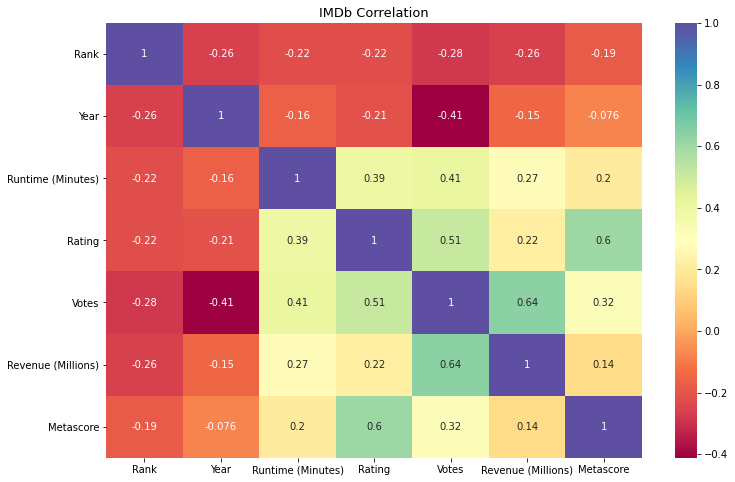

In [38]:
import seaborn as sns
plt.subplots(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, cmap = "Spectral")
plt.title("IMDb Correlation", fontsize = 13)
plt.show()

In [39]:
#Visualization Using Autoviz

In [40]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (1000, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


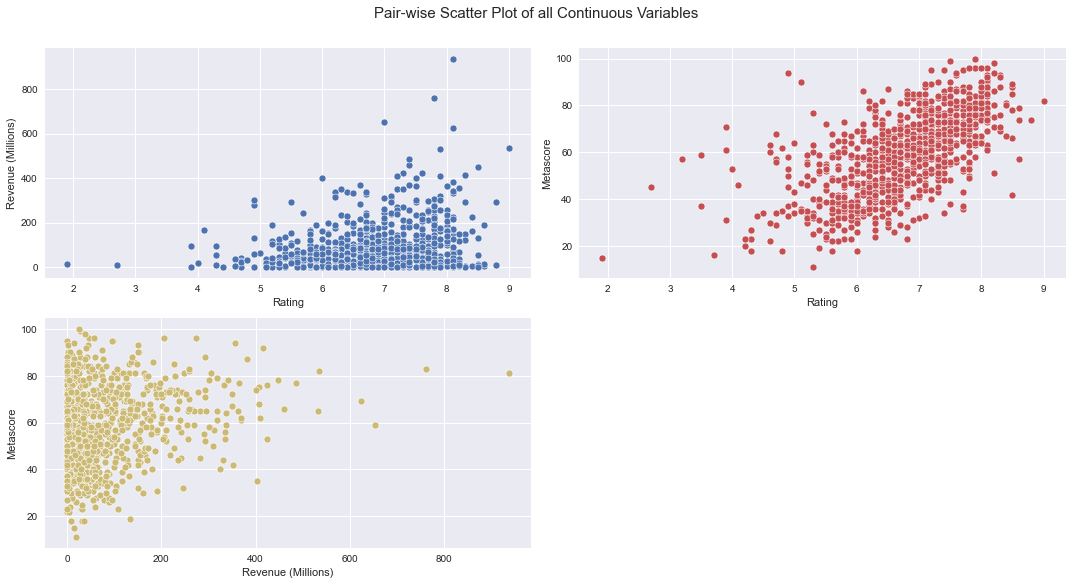

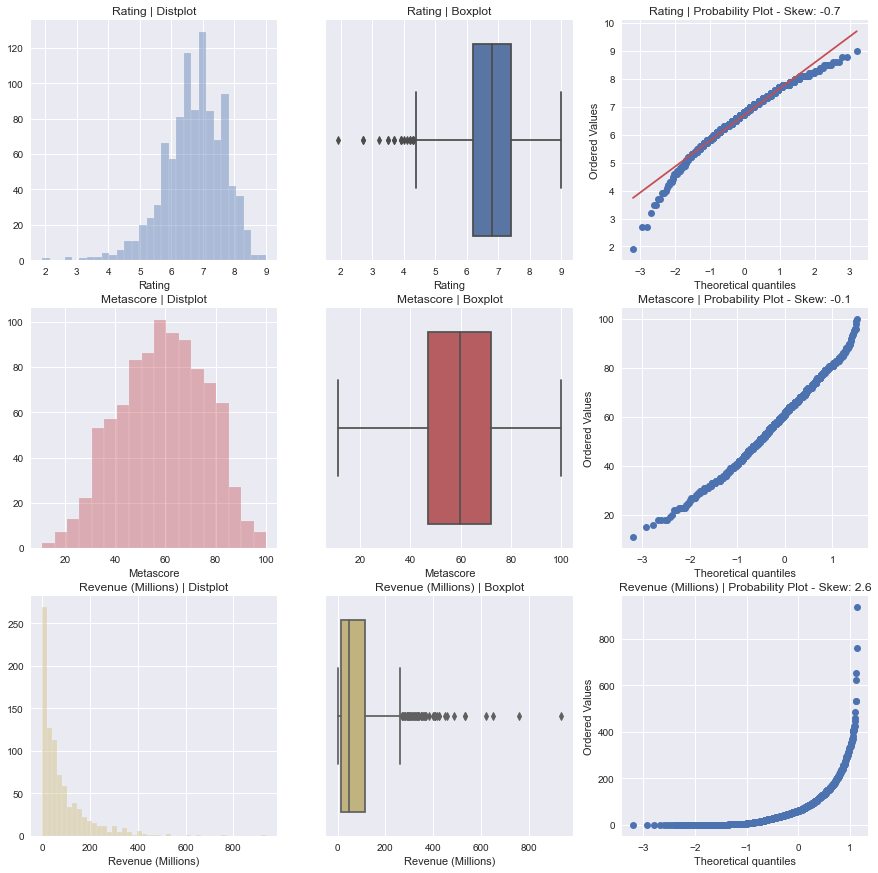

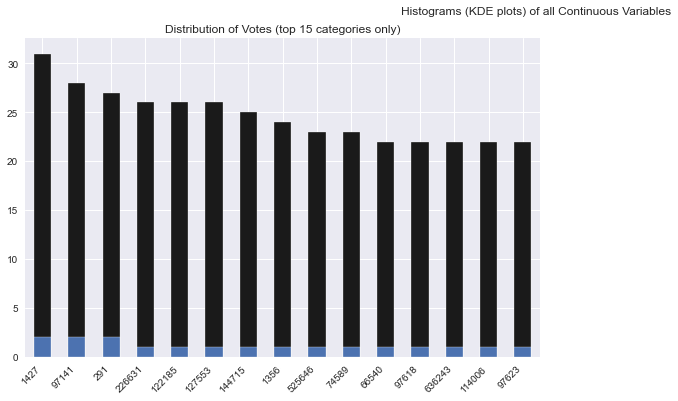

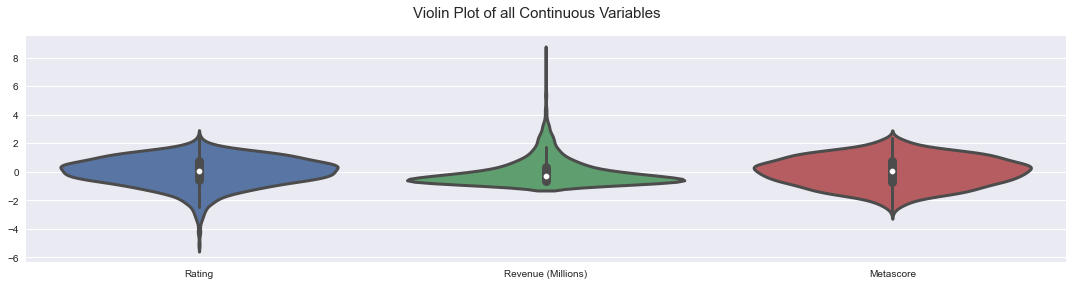

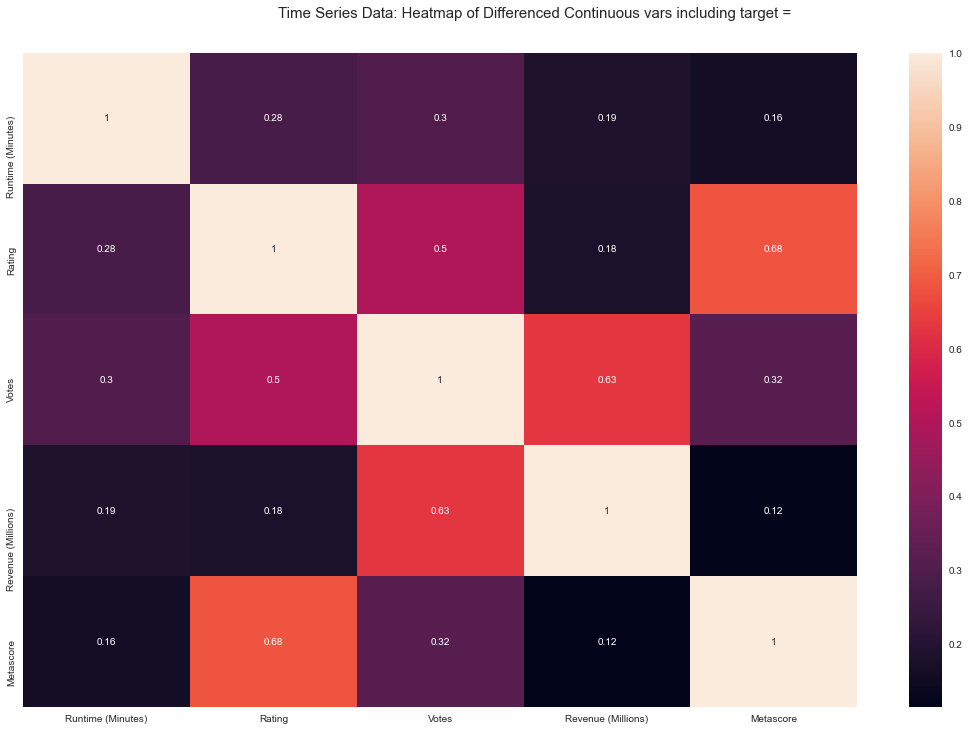

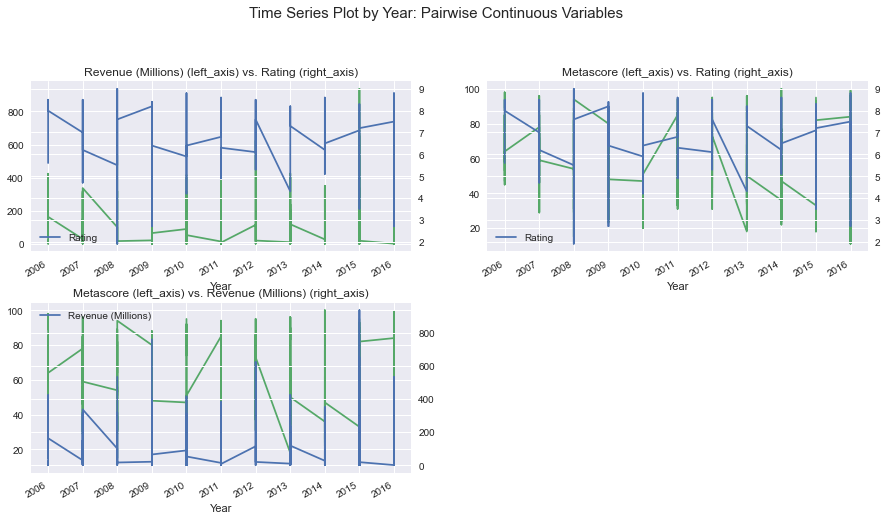

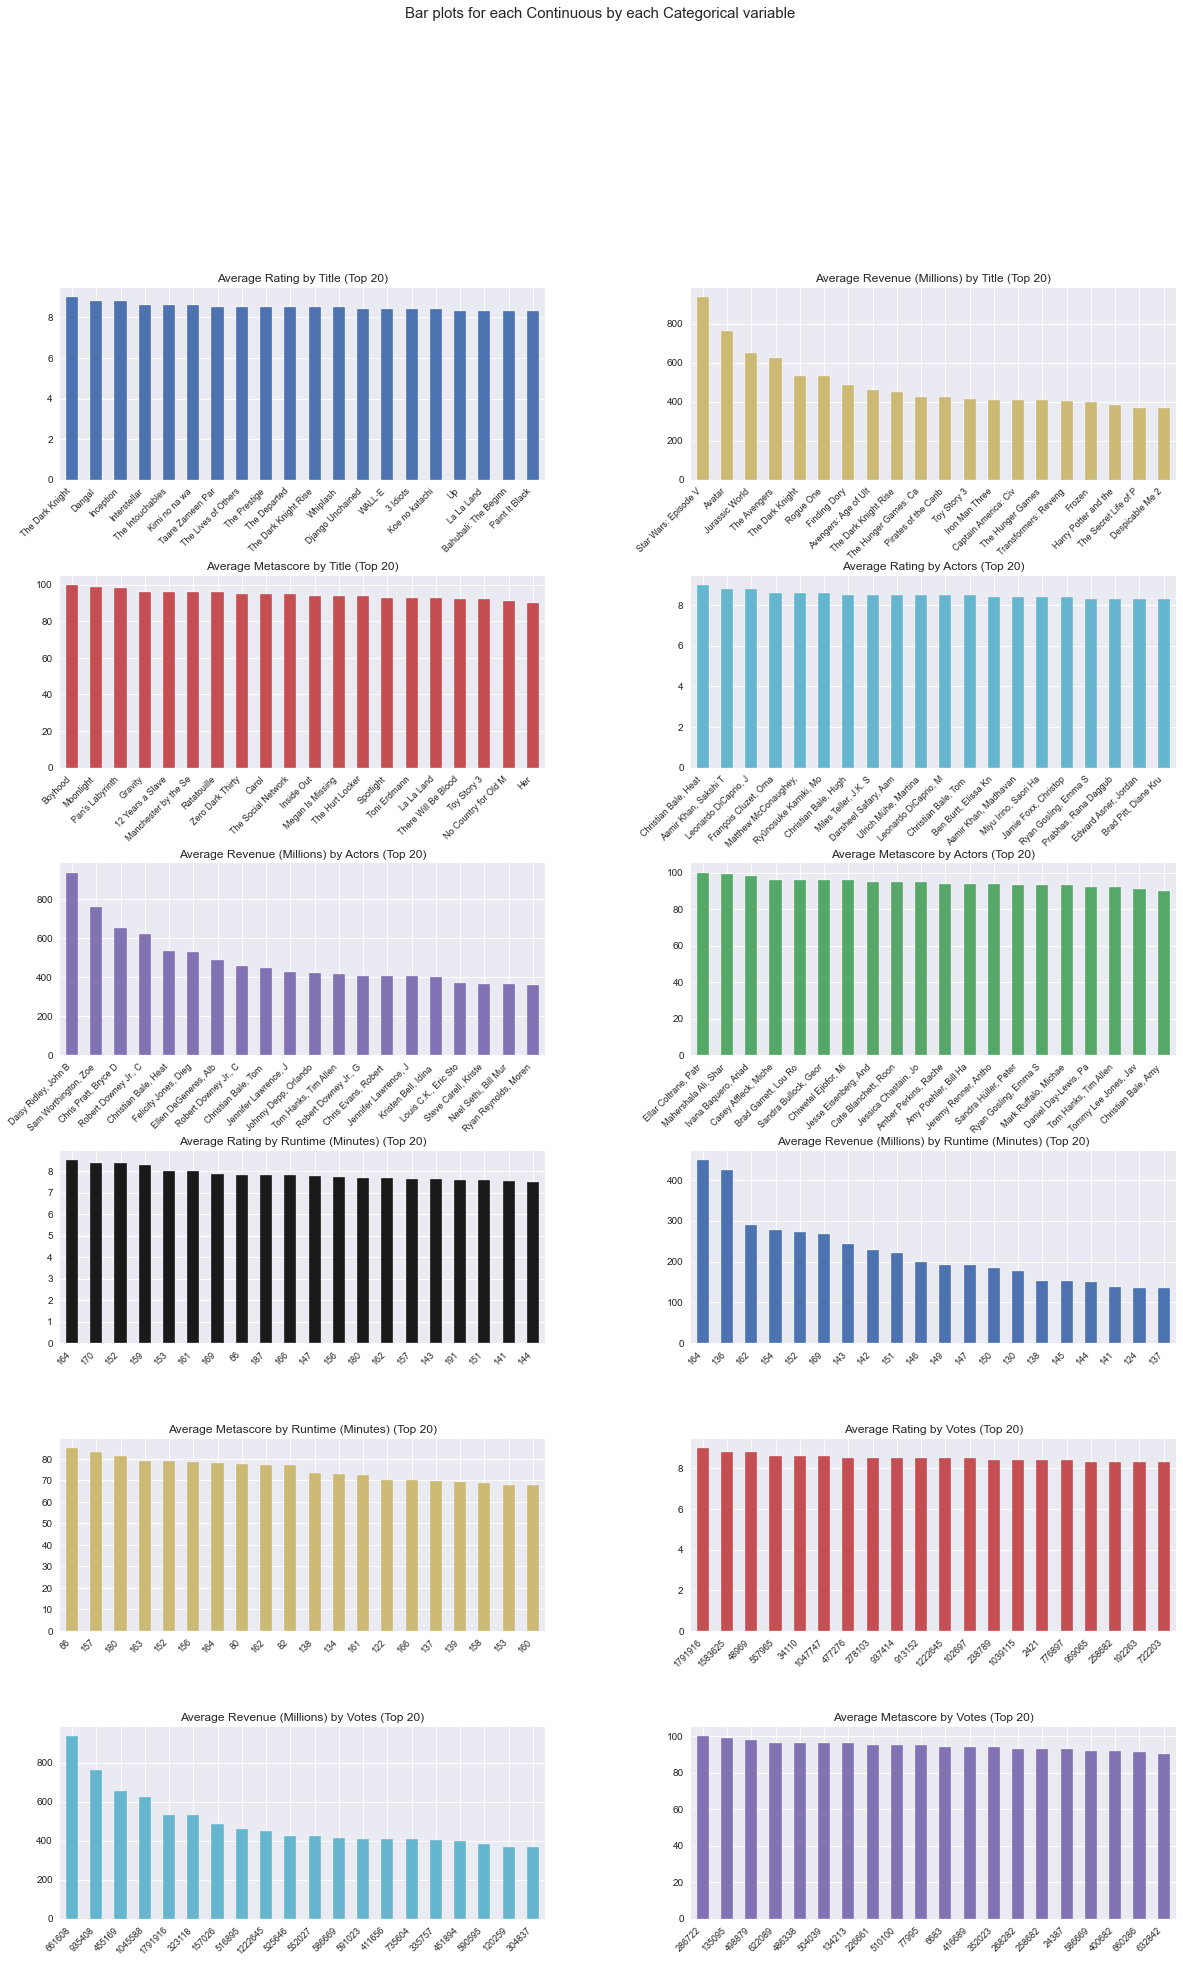

Time to run AutoViz (in seconds) = 17.742

 ###################### VISUALIZATION Completed ########################


In [41]:
aviz=df = AV.AutoViz(r'C:\Users\staff\Desktop\Staffin\PROJ\IMBD\IMDB-Movie-Data.csv')
